### DQN
![](./image/DQN.jpg)

In [1]:
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
from brain.DQN import DeepQNetwork
from utils import *
import gym
import time
import pandas
import numpy as np
import ipdb
import pickle
from tqdm import tqdm
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
%matplotlib inline

In [2]:
env = gym.make('CartPole-v0')
agent = DeepQNetwork(env.action_space.n, env.observation_space.shape[0],
                     learning_rate=0.0001,
                     reward_decay=0.99,
                     e_greedy=0.95,
                     replace_target_iter=2000,
                     memory_size=50000,
                     e_greedy_increment=0.00001,
                     batch_size=512,
                     output_graph=True)

In [3]:
def try_one_episode(max_episode=200):
    observation = env.reset()
    for i in range(max_episode):
        env.render(mode='rgb_array')
        # observation = discretize(observation)
        show_state(env, i, None)
        action = agent.choose_action(observation)
        observation, reward, done, info = env.step(action)
        if done:
            break
    clear_output(wait=True)

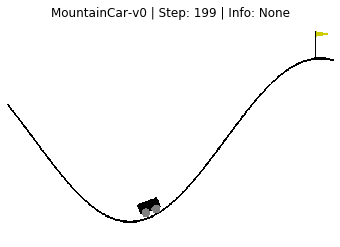

In [4]:
try_one_episode(max_episode=200)

In [4]:
final_rewards, step = [], 0
running_reward = 0
pbar = tqdm(range(1000))
for episode in pbar:
    # initial observation
    observation = env.reset()
    rewards = []

    t = 0
    while True:
        # RL choose action based on observation
        action = agent.choose_action(observation)

        # RL take action and get next observation and reward
        observation_, reward, done, info = env.step(action)
        rewards.append(reward)
        
        if done:
            # reward is very important for Reinforcement Learning
            # Only in CartPole-v0 environment
            # reward = -200
            # reward = 200    # for MountainCar-v0 env
            pass

        agent.store_transition(observation, action, reward, observation_)
        

        if step > 2000:
            agent.learn()

        # swap observation
        observation = observation_

        # break while loop when end of this episode
        if done:
            break
        step += 1
        
    running_reward = running_reward * 0.99 + 0.01 * np.sum(rewards)
    pbar.set_description(f'Running rewards: {round(running_reward, 4)}, Current rewards: {round(np.sum(rewards))}')
    final_rewards.append(np.sum(rewards))

Running rewards: 53.8459, Current rewards: 77.0: 100%|██████████| 1000/1000 [07:21<00:00,  1.97it/s]


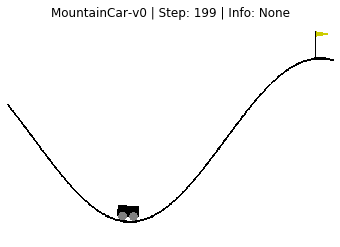

In [5]:
try_one_episode(max_episode=200)

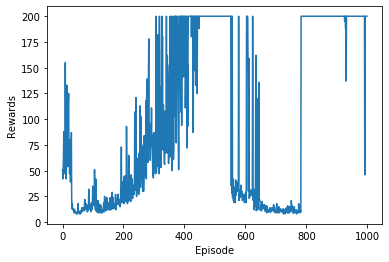

In [6]:
x = np.arange(len(final_rewards))
plt.plot(x, final_rewards)
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.savefig('./image/DQN-cartpole.png')

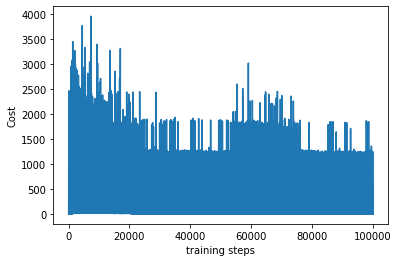

In [7]:
agent.plot_cost()

### Save the model

### Load the model